In [257]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models import Phrases
from gensim.corpora import Dictionary

In [258]:
Grizzlies = pd.read_csv('C:/Users/LukeB/OneDrive/Documents/Datasets/Grizzlies_Text_data.csv')
Knicks = pd.read_csv('C:/Users/LukeB/OneDrive/Documents/Datasets/Knicks_Text_Data.csv')

In [259]:
def text2tokens(text):
    
    text_lower = text.lower()
    
    tokens = word_tokenize(text_lower)
    
    stop_words = set(stopwords.words('english'))

    tokens = [t for t in tokens if t not in stop_words]
    
    tokens = [t for t in tokens if len(t) >= 3]
    
    stemmer = PorterStemmer()
    
    tokens = [stemmer.stem(t) for t in tokens]

    return tokens
    

In [260]:
Grizzlies['tokens'] = Grizzlies['text'].apply(lambda x: text2tokens(x))
#Knicks['tokens'] = Knicks['text'].apply(lambda x: text2tokens(x))

In [261]:
def gen_bow(df):
        
    dictionary = Dictionary(df['tokens'])
    
    dictionary.filter_extremes(no_below=5, no_above=0.5)
    
    df['bow'] = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
        
    return df, dictionary

In [262]:
Grizzlies, Grizzlies_Dict = gen_bow(Grizzlies)
#Knicks, Knicks_Dict = gen_bow(Knicks)

In [263]:
Grizzlies_Data_Processing = Grizzlies.loc[:, ['game', 'bow']]
Grizzlies_Data_Processing

,game,bow
0,True,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,True,"[(0, 1), (3, 1), (9, 2), (39, 1), (40, 1), (41..."
2,True,"[(2, 1), (3, 1), (49, 1), (80, 1), (81, 1), (8..."
3,False,"[(0, 1), (2, 1), (4, 1), (5, 2), (9, 3), (14, ..."
4,False,"[(177, 1), (216, 1), (245, 1), (278, 1), (296,..."
...,...,...
466,False,"[(4, 1), (18, 1), (21, 1), (27, 4), (37, 2), (..."
467,False,"[(0, 1), (5, 1), (13, 2), (26, 2), (32, 1), (3..."
468,False,"[(7, 1), (30, 1), (44, 10), (46, 1), (58, 1), ..."
469,True,"[(1, 1), (4, 1), (13, 2), (14, 1), (15, 1), (3..."


In [264]:
def vectorize_row(row):
    vectorized_row = [0] * len(index_nums)  
    for index, count in row['bow']:  
        if index in index_nums:  
            vectorized_row[index_nums.index(index)] = count 
    return vectorized_row

Grizzlies_Data_Processing['vectorized_bow'] = Grizzlies.apply(vectorize_row, axis=1)
Grizzlies_Data_Processing['label'] = Grizzlies_Data_Processing['game'].apply(lambda x: 1 if x else 0)
Grizzlies_Data_Final = Grizzlies_Data_Processing.loc[:, ['vectorized_bow', 'label']]

array_df = pd.DataFrame(Grizzlies_Data_Final['vectorized_bow'].tolist(), columns=[f'Index_{i}' for i in range(len(Grizzlies_Data_Final['vectorized_bow'].iloc[0]))])

Grizzlies_Concatenated_Final = pd.concat([Grizzlies_Data_Final, array_df], axis=1)

Grizzlies_Concatenated_Final = Grizzlies_Concatenated_Final.drop(columns=['vectorized_bow'])
Grizzlies_Concatenated_Final

,label,Index_0,Index_1,Index_2,Index_3,Index_4,Index_5,Index_6,Index_7,Index_8,...,Index_2459,Index_2460,Index_2461,Index_2462,Index_2463,Index_2464,Index_2465,Index_2466,Index_2467,Index_2468
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
467,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
469,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
Grizzly_Train = Grizzlies_Concatenated_Final.drop(columns=['label']).copy()

In [266]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Grizzly_Train,Grizzlies_Data_Final['label'])

In [267]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [268]:
res = model.predict(X_test)

In [269]:
model.score(X_test, y_test)

0.576271186440678

In [270]:
print('pred    true')

for pred, true_label in zip(res, y_test):
    print(pred, '     ', true_label)

pred    true
0       1
1       0
0       1
1       0
0       0
0       0
0       0
0       1
0       0
0       0
1       1
0       1
1       1
0       0
1       0
1       0
0       0
0       0
0       1
0       0
0       0
0       0
0       0
1       0
0       0
0       0
0       1
1       1
0       1
1       0
1       1
0       0
1       1
0       0
1       1
0       0
1       0
1       1
1       1
1       0
1       0
0       0
0       0
1       1
1       1
0       0
0       1
0       1
0       1
0       0
0       0
0       1
1       1
0       0
0       1
0       0
1       0
0       0
1       1
1       1
1       1
0       1
0       0
0       0
0       0
0       0
0       1
0       0
0       1
0       0
1       0
1       1
1       0
0       1
1       0
1       0
1       1
1       0
1       1
0       1
1       0
1       1
0       1
1       1
1       0
1       0
1       0
0       1
0       1
0       1
0       1
0       0
0       1
1       1
0       0
1       1
0       0
1       0
0      

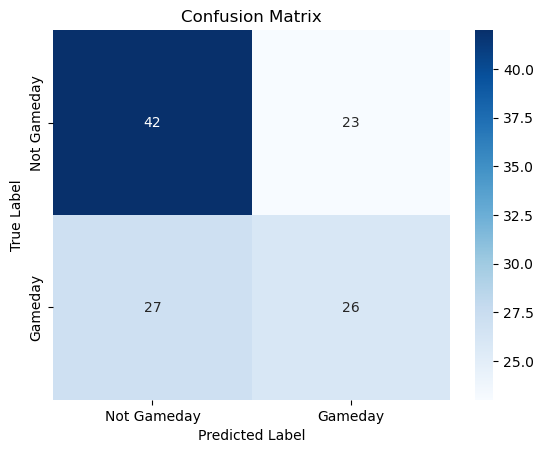

In [271]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, res)

class_labels = ['Not Gameday', 'Gameday']  

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [272]:
#As we can see not the most accurate. Gonna try to clean the data a little more for the Knicks data see if I can
#get anything more accurate

In [273]:
Knicks

,date,text,game
0,2024-02-15,All the injured Knicks sitting in the Hyperbol...,False
1,2024-02-15,"We will go into March like Lions, and eat lamb...",False
2,2024-02-15,Ringer’s Newest Rankings: Brunson at #15 (Othe...,False
3,2024-02-15,"Jalen Brunson quotes post Grimes trade.\n""Obvi...",False
4,2024-02-15,State of the Subreddit: All Star Weekend 2024\...,False
...,...,...,...
407,2024-04-03,Post Game Thread: The Miami Heat defeat The Ne...,False
408,2024-04-03,Looking for a specific pic of Thibs\nDoubt any...,False
409,2024-04-03,Frazier Bomb: Clyde Frazier announces live on ...,False
410,2024-04-03,"At this point, just try to get the 6th seed. \...",False


In [280]:
# import re

# def remove_special_characters(text):
#     pattern = r'[^a-zA-Z0-9\s.,!?\'"]'
#     clean_text = re.sub(pattern, '', text)
#     return clean_text

# Knicks['text'] = Knicks['text'].apply(remove_special_characters)


In [313]:
def clean_text(text):
    
    words = word_tokenize(text)
    
    words = [re.sub(r'[^a-zA-Z]', '', word).lower() for word in words]
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    words = [word for word in words if word]
    
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [314]:
Knicks['text'] = Knicks['text'].apply(clean_text)
Knicks

,date,text,game,label
0,2024-02-15,injured knicks sitting hyperbolic time chamber...,False,0
1,2024-02-15,go march like lions eat lambs way injured play...,False,0
2,2024-02-15,ringers newest rankings brunson knicks randle ...,False,0
3,2024-02-15,jalen brunson quotes post grimes trade obvious...,False,0
4,2024-02-15,state subreddit star weekend officially entere...,False,0
...,...,...,...,...
407,2024-04-03,post game thread miami heat defeat new york kn...,False,0
408,2024-04-03,looking specific pic thibs doubt anyones gon n...,False,0
409,2024-04-03,frazier bomb clyde frazier announces live air ...,False,0
410,2024-04-03,point try get th seed ill take cleveland first...,False,0


In [315]:
Knicks['label'] = Knicks['game'].apply(lambda x: 1 if x else 0)
Knicks

,date,text,game,label
0,2024-02-15,injured knicks sitting hyperbolic time chamber...,False,0
1,2024-02-15,go march like lions eat lambs way injured play...,False,0
2,2024-02-15,ringers newest rankings brunson knicks randle ...,False,0
3,2024-02-15,jalen brunson quotes post grimes trade obvious...,False,0
4,2024-02-15,state subreddit star weekend officially entere...,False,0
...,...,...,...,...
407,2024-04-03,post game thread miami heat defeat new york kn...,False,0
408,2024-04-03,looking specific pic thibs doubt anyones gon n...,False,0
409,2024-04-03,frazier bomb clyde frazier announces live air ...,False,0
410,2024-04-03,point try get th seed ill take cleveland first...,False,0


In [328]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [332]:
X, X_t, y, y_t = train_test_split(Knicks.text,Knicks.label)

188    blood garden yal kid knicks era dont remember ...
31     daily discussion thread february daily discuss...
358    miles mcbride stud see lot jrue holiday guy ho...
76     bailed refs least fouls called josh hart hits ...
244    favorite player time yankees sub asked questio...
                             ...                        
186    feeling knicks vs magic first round matchup kn...
241    get flair hart milk mustache could really use ...
363    cant wait minute report today load crap calls ...
359    jalen brunson top offensive player league last...
196    think magical iq sweatshirt kinda stupid lmao ...
Name: text, Length: 309, dtype: object

In [330]:
clf.fit(X, y)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [331]:
clf.score(X_t,y_t)

0.6796116504854369

In [336]:
#Gonna retry sentiment analysis

In [341]:
with open('C:/Users/LukeB/Downloads/4289437-1bb4d7f9ee82150f339f09b5b1a0e6823d633958/4289437-1bb4d7f9ee82150f339f09b5b1a0e6823d633958/positive-words.txt', 'r') as file:
    positive_words = file.read()
    
with open('C:/Users/LukeB/Downloads/4289441-dad8b64b307cd6df8068a379079becbb3f91101a/4289441-dad8b64b307cd6df8068a379079becbb3f91101a/negative-words.txt', 'r') as file:
    negative_words = file.read()
    


In [342]:
def get_sentiment(tokens, positive_tokens, negative_tokens):
    positive_count = sum(token in positive_tokens for token in tokens)
    negative_count = sum(token in negative_tokens for token in tokens)
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

In [346]:
Knicks['tokens'] = Knicks['text'].apply(lambda x: text2tokens(x))
Knicks

,date,text,game,label,tokens
0,2024-02-15,injured knicks sitting hyperbolic time chamber...,False,0,"[injur, knick, sit, hyperbol, time, chamber, r..."
1,2024-02-15,go march like lions eat lambs way injured play...,False,0,"[march, like, lion, eat, lamb, way, injur, pla..."
2,2024-02-15,ringers newest rankings brunson knicks randle ...,False,0,"[ringer, newest, rank, brunson, knick, randl, ..."
3,2024-02-15,jalen brunson quotes post grimes trade obvious...,False,0,"[jalen, brunson, quot, post, grime, trade, obv..."
4,2024-02-15,state subreddit star weekend officially entere...,False,0,"[state, subreddit, star, weekend, offici, ente..."
...,...,...,...,...,...
407,2024-04-03,post game thread miami heat defeat new york kn...,False,0,"[post, game, thread, miami, heat, defeat, new,..."
408,2024-04-03,looking specific pic thibs doubt anyones gon n...,False,0,"[look, specif, pic, thib, doubt, anyon, gon, k..."
409,2024-04-03,frazier bomb clyde frazier announces live air ...,False,0,"[frazier, bomb, clyde, frazier, announc, live,..."
410,2024-04-03,point try get th seed ill take cleveland first...,False,0,"[point, tri, get, seed, ill, take, cleveland, ..."


In [351]:
Knicks['sentiment'] = Knicks['tokens'].apply(get_sentiment, args=(positive_tokens, negative_tokens))
Knicks

,date,text,game,label,tokens,sentiment
0,2024-02-15,injured knicks sitting hyperbolic time chamber...,False,0,"[injur, knick, sit, hyperbol, time, chamber, r...",positive
1,2024-02-15,go march like lions eat lambs way injured play...,False,0,"[march, like, lion, eat, lamb, way, injur, pla...",positive
2,2024-02-15,ringers newest rankings brunson knicks randle ...,False,0,"[ringer, newest, rank, brunson, knick, randl, ...",positive
3,2024-02-15,jalen brunson quotes post grimes trade obvious...,False,0,"[jalen, brunson, quot, post, grime, trade, obv...",positive
4,2024-02-15,state subreddit star weekend officially entere...,False,0,"[state, subreddit, star, weekend, offici, ente...",positive
...,...,...,...,...,...,...
407,2024-04-03,post game thread miami heat defeat new york kn...,False,0,"[post, game, thread, miami, heat, defeat, new,...",positive
408,2024-04-03,looking specific pic thibs doubt anyones gon n...,False,0,"[look, specif, pic, thib, doubt, anyon, gon, k...",positive
409,2024-04-03,frazier bomb clyde frazier announces live air ...,False,0,"[frazier, bomb, clyde, frazier, announc, live,...",positive
410,2024-04-03,point try get th seed ill take cleveland first...,False,0,"[point, tri, get, seed, ill, take, cleveland, ...",negative


In [355]:
Knicks['label_two'] = Knicks['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
Knicks

,date,text,game,label,tokens,sentiment,label_two
0,2024-02-15,injured knicks sitting hyperbolic time chamber...,False,0,"[injur, knick, sit, hyperbol, time, chamber, r...",positive,1
1,2024-02-15,go march like lions eat lambs way injured play...,False,0,"[march, like, lion, eat, lamb, way, injur, pla...",positive,1
2,2024-02-15,ringers newest rankings brunson knicks randle ...,False,0,"[ringer, newest, rank, brunson, knick, randl, ...",positive,1
3,2024-02-15,jalen brunson quotes post grimes trade obvious...,False,0,"[jalen, brunson, quot, post, grime, trade, obv...",positive,1
4,2024-02-15,state subreddit star weekend officially entere...,False,0,"[state, subreddit, star, weekend, offici, ente...",positive,1
...,...,...,...,...,...,...,...
407,2024-04-03,post game thread miami heat defeat new york kn...,False,0,"[post, game, thread, miami, heat, defeat, new,...",positive,1
408,2024-04-03,looking specific pic thibs doubt anyones gon n...,False,0,"[look, specif, pic, thib, doubt, anyon, gon, k...",positive,1
409,2024-04-03,frazier bomb clyde frazier announces live air ...,False,0,"[frazier, bomb, clyde, frazier, announc, live,...",positive,1
410,2024-04-03,point try get th seed ill take cleveland first...,False,0,"[point, tri, get, seed, ill, take, cleveland, ...",negative,0


In [432]:
clf2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [433]:
X2, X_t2, y2, y_t2 = train_test_split(Knicks.text,Knicks.label_two)

In [434]:
clf2.fit(X2, y2)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [435]:
clf2.predict(X_t2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [436]:
clf2.score(X_t2, y_t2)

0.8252427184466019

In [437]:
#Example reddit post Strings

In [438]:
Negative_Post = "To the Knick doomers OG is not soft he is/was hurt. OG is set to return and it is careless to call him soft because he was injured. If you know nothing about medicine, it might not be best to make certain claims about a medical situation when you are neither trained nor licensed to be a physician. Happy to have OG back. Go Knicks If there’s one thing the Knicks are not, it’s soft. Far from it. I've yet to see a metal bat that is soft The same people on twitter that called him soft will now say that the Knicks are rushing him back and he should rest until the playoffs. No matter what, some segment of the fan base will be pissed. hes a soft bitch but also its thibs fault but also leon got fleeced but also trade randle but also etc etc. Same people calling him soft will bitch about some shit Stephen a smith said about the Knicks for months at a time lol I'm a licensed medical professional, and while I obviously don't have all of the data around his tests and treatment, I can pretty confidently say that all of these doomers are whiny fuckin bitches They call me Doctor Pussy It’s his elbow. He has to be right if he’s gonna be effective Same people who say OG is soft are the same homies who think shooting the fair is what you do to get your girl a stuffed teddy bear. people are just upset. i wouldnt take it too seriously Dude was hurt, no doubt. But he is soft. His history proves this. “He is/was hurt.” For 4 years? He’s not soft, but he’s extremely fragile and probably not built for professional sports. Oh, and I’d sign him to a mega deal in a heart beat."
Positive_Post = "The unspoken argument for Thibs being Coach of the Year Every major contributor on this team is having the best production of their career this year.Brunson 28/7 on 48% FG and 40% 3PT, should be top 5 MVP. Randle 24/9/5 on his best efficiency as a Knick despite awful start. Divo second in the league in made 3PM. Hartenstein’s best defense and passing of his career. OG was a plus/minus god and 15-2 when he played. Deuce went from the end of the bench to clamping the best opposing guard and shooting 42% from 3. Mitch was top 3 DPOY and leading league in OREB. Hart has all 6 triple doubles of his career this year.Thibs really gets the best out of his guys. We can bitch about minutes and injuries, but Randle was a freak injury and OG probably had this elbow issue dating back to Toronto. 2 years ago, everyone would call this group of players a lottery team. When healthy, they’re easily a top 5 team in the NBA. Thibs somehow gets the most out of these guys individually and as a team.Obligatory shout out to Leon Rose too. You can see it’s HIS teamThe FO recruits for him and his cultureAnd he delivers the planThibs is NY Well said!. Dusty when you gonna suit up and replace Randle? hes one of the few coaches in the league where you can tangibly see his effect. his reputation precedes himself and the players take on his philosophy and identity instead of vice versa. I agree but he’s not the shiny new story like he was in 2020. Thibs is just doing what he’s known to do at this point, albeit doing it very very well. I agree he deserves it, but he won’t get it because he just got it three years ago and Thibs ‘transforming’ the Knicks is an old story at this point. The seeding is so out of wack that if the team somehow goes 6-0 and gets the 2 seed he's going to get a lot of buzz for COTY. He deals with one injured starter after another and backs his guys clearly. He’s coach of the year in the players’ hearts for sure. Brunson is top 5 in scoring and has similar stats to Tatum but doesn't play with 4 other fringe all stars. It's absurd how overlooked he is in MVP debate Yeah I have it: Jokic, Luka, Brunson, SGA, Tatum, Giannis If we get the 2 seed, (we’re 2 games back), and Celtics/Nuggets hold onto the top seed (Celtics stacked roster/Jokic will get most credit), I think there’s an extremely strong possibility for the reasons you mentioned. Would take a few things to happen but not impossible, and there’s definitely a narrative you can spin hereEdit: so right now Thibs is 5th in COTY odds. Ahead of him are OKC/MIN coach, so yeah we probably need Denver 1 seed. Then Jamahl Mosley (I can’t see any argument for him over Thibs if we pass them), then Joe Mazzulla (Celtics are stacked). So it would take a late season run and some luck but I think there’s a pathAlso how many threads were made to fire Thibs in the past few years in this sub lol. Completely insane. Cuz he didn’t play Obi over Randle or something"

EX_Posts = [Negative_Post, Positive_Post]
clf2.predict(EX_Posts)

array([1, 1], dtype=int64)

In [439]:
Knicks

,date,text,game,label,tokens,sentiment,label_two
0,2024-02-15,injured knicks sitting hyperbolic time chamber...,False,0,"[injur, knick, sit, hyperbol, time, chamber, r...",positive,1
1,2024-02-15,go march like lions eat lambs way injured play...,False,0,"[march, like, lion, eat, lamb, way, injur, pla...",positive,1
2,2024-02-15,ringers newest rankings brunson knicks randle ...,False,0,"[ringer, newest, rank, brunson, knick, randl, ...",positive,1
3,2024-02-15,jalen brunson quotes post grimes trade obvious...,False,0,"[jalen, brunson, quot, post, grime, trade, obv...",positive,1
4,2024-02-15,state subreddit star weekend officially entere...,False,0,"[state, subreddit, star, weekend, offici, ente...",positive,1
...,...,...,...,...,...,...,...
407,2024-04-03,post game thread miami heat defeat new york kn...,False,0,"[post, game, thread, miami, heat, defeat, new,...",positive,1
408,2024-04-03,looking specific pic thibs doubt anyones gon n...,False,0,"[look, specif, pic, thib, doubt, anyon, gon, k...",positive,1
409,2024-04-03,frazier bomb clyde frazier announces live air ...,False,0,"[frazier, bomb, clyde, frazier, announc, live,...",positive,1
410,2024-04-03,point try get th seed ill take cleveland first...,False,0,"[point, tri, get, seed, ill, take, cleveland, ...",negative,0


In [442]:
Grizzlies.to_csv('C:/Users/LukeB/OneDrive/Documents/Datasets/Grizzlies_DF_Final.csv', index = False)
Knicks.to_csv('C:/Users/LukeB/OneDrive/Documents/Datasets/Knicks_DF_Final.csv', index = False)